## Finding the Max Sharpe Ratio Portfolio :

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
vol = erk.annualize_vol(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [25]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd

def msr(riskfree_rate, er, cov):
    """
    riskfree_rate + ER + COV --> w
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n) # could be whatever we like but sum equals 1
    bounds = ((0.0,1.0), )*n # tuple of tuple
    weights_sum_to_1 = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        returns the negative of the sharpe ratio, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args= (riskfree_rate, er, cov,), method="SLSQP",
                       options={'disp': False},
                       constraints = (weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x


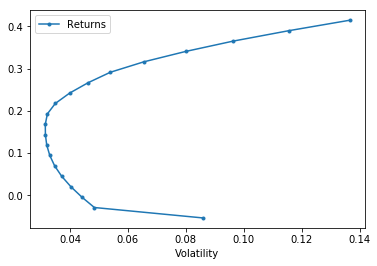

In [19]:
erk.plot_ef(20, er, cov)

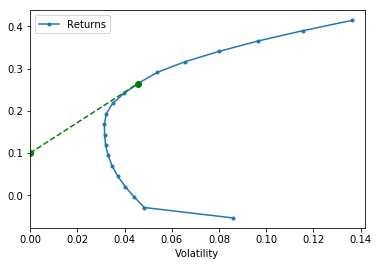

In [22]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# add CML - Capital Market line
cml_x = [0,vol_msr]
cml_y = [rf,r_msr]
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

In [24]:
len(w_msr)

30

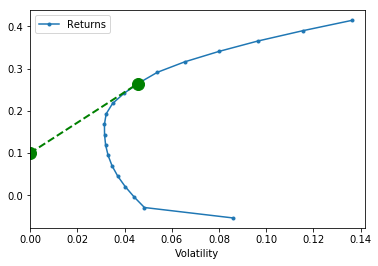

In [32]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = 0.1)

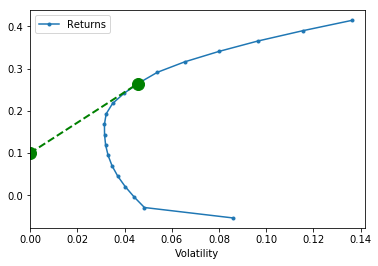

In [64]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = 0.1)

In [65]:
rf = 0.01
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
(100*r_msr.round(2), 100*vol_msr.round(2))

(22.0, 4.0)

In [66]:
pouf = pd.DataFrame({
    "er":(100*er).round(5), 
    "vol":(100*vol).round(5),
    "w_msr_in_pct": (100*w_msr).round(5)
})
pouf.sort_values(by = "w_msr_in_pct", ascending=False)

,er,vol,w_msr_in_pct
Util,14.59035,15.44835,34.01601
Hlth,24.66405,17.54408,29.46828
Rtail,20.72470,20.43587,18.27595
BusEq,27.19517,33.97584,7.71442
Coal,41.46890,47.29605,6.34465
ElcEq,27.24197,23.93568,4.18070
Food,11.67987,17.69504,0.00000
Mines,-5.35544,29.73531,0.00000
Fin,22.33714,21.85839,0.00000
Meals,6.73999,18.90589,0.00000
